# 1.Google Collab Environment Setup

Please run this Google Colab Jupyter Notebook with the following settings under "Runtime" -> "Change runtime type".

Runtime type: Python 3

Hardware accelerator: T4 GPU

## Setting up Python 3.8
This project uses Python 3.8 whilst Google Colab currently uses Python 3.10. Run the following commands to downgrade to Python 3.8.

Note: This process takes quite some time so you can leave it running in the background.

Install Required Dependencies

In [1]:
# downgrade Python by reinstalling pip and distutils
!apt-get install python3.8 python3-pip python3.8-distutils
!update-alternatives --install /usr/local/bin/python3 python3 /usr/bin/python3.8 1

# check the result
!python3 --version

!apt-get update
!apt install software-properties-common
!sudo dpkg --remove --force-remove-reinstreq python3-pip python3-setuptools python3-wheel
!apt-get install python3-pip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib mailcap mime-support
  python3-setuptools python3-wheel python3.8-lib2to3 python3.8-minimal
Suggested packages:
  python-setuptools-doc python3.8-venv binfmt-support
The following NEW packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib mailcap mime-support python3-pip
  python3-setuptools python3-wheel python3.8 python3.8-distutils
  python3.8-lib2to3 python3.8-minimal
0 upgraded, 11 newly installed, 0 to remove and 18 not upgraded.
Need to get 7,094 kB of archives.
After this operation, 29.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3.70+nmu1ubuntu1 [23.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 mime-support all 3.66 [3,696 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 p

In [2]:
# clone FollowYourPose repository
!git clone https://github.com/mayuelala/FollowYourPose.git

# clone MMpose repository
!git clone https://github.com/open-mmlab/mmpose.git

# clone team 15's repository
!git clone https://github.com/ong-yi-xuan/ict3104-team15.git

Cloning into 'FollowYourPose'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 325 (delta 35), reused 71 (delta 20), pack-reused 237
Receiving objects: 100% (325/325), 277.89 MiB | 40.34 MiB/s, done.
Resolving deltas: 100% (92/92), done.
Cloning into 'mmpose'...
remote: Enumerating objects: 30159, done.
remote: Counting objects: 100% (936/936), done.
remote: Compressing objects: 100% (579/579), done.
remote: Total 30159 (delta 459), reused 706 (delta 349), pack-reused 29223
Receiving objects: 100% (30159/30159), 51.77 MiB | 28.55 MiB/s, done.
Resolving deltas: 100% (21256/21256), done.
Cloning into 'ict3104-team15'...
remote: Enumerating objects: 181, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 181 (delta 13), reused 34 (delta 7), pack-reused 138
Receiving objects: 100% (181/181), 215.08 MiB | 41.05 MiB/s, done.
Re

In [6]:
# install required dependencies

# triton and torch
!python3 -m pip install -q $(grep -ivE "triton|torch|torchvision|xformers" FollowYourPose/requirements.txt) # Install all except those specified (outdated in the req file)
!python3 -m pip install -q triton==2.0.0 torch==2.0.1 torchvision imageio-ffmpeg xformers==0.0.21 --extra-index-url https://download.pytorch.org/whl/cu113

# ipywidgets for UI
!python3 -m pip install ipywidgets

# gdown for downloading files from google drive
!python3 -m pip install gdown

# MMpose for skeleton extraction from input video
!python3 -m pip install -U openmim
!python3 -m mim install "mmengine==0.8.5"
!python3 -m mim install "mmcv==2.0.1"
!python3 -m mim install "mmpose==1.1.0"
!python3 -m pip install -r mmpose/requirements.txt
!python3 -m pip install -U bitsandbytes

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yapf 0.40.2 requires importlib-metadata>=6.6.0, but you have importlib-metadata 6.0.0 which is incompatible.
openxlab 0.0.26 requires pytz~=2023.3, but you have pytz 2022.7.1 which is incompatible.
openxlab 0.0.26 requires setuptools~=60.2.0, but you have setuptools 65.6.3 which is incompatible.
openxlab 0.0.26 requires tqdm~=4.65.0, but you have tqdm 4.64.1 which is incompatible.
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
  Using cached tqdm-4.65.2-py3-none-any.whl (77 kB)
  Using cached setuptools-60.2.0-py3-none-any.whl (953 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.7.1
    Uninstalling pytz-2022.7.1:
      Successfully uninstalled pytz-2022.7.1
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.1
    Uninstalling tqdm-4.64.1:
      Succ

In [5]:
# importing other dependencies
import yaml
import gdown
import os
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML, Image, Video

In [ ]:
# download txt2video file
txt2video_file_id = "19jT40m76ZPkF_zUVa66QGiBJP9UsSvjn"
url = 'https://drive.google.com/uc?id=' + txt2video_file_id
output = 'txt2video.py'  # Desired name of the downloaded file
gdown.download(url, output, quiet=False)


In [6]:
# download test charades file for mmpose
gdown.download("https://drive.google.com/file/d/1K72vYV_fQW9akoEwPEBQ22fWQs8sIqsf/view", "test.mp4",quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1K72vYV_fQW9akoEwPEBQ22fWQs8sIqsf
To: /content/test.mp4
100%|██████████| 1.19M/1.19M [00:00<00:00, 9.83MB/s]


'test.mp4'

In [7]:
# download mmpose_run.py from google drive
gdown.download("https://drive.google.com/file/d/1eWggN4hIghei-TN5cqpbNXHVyj7NrEk8/view", "mmpose_run.py",quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1eWggN4hIghei-TN5cqpbNXHVyj7NrEk8
To: /content/mmpose_run.py
100%|██████████| 7.55k/7.55k [00:00<00:00, 6.76MB/s]


'mmpose_run.py'

# 2. Data Exploration

R2. A Data Exploration section in the notebook that can load, list and display video data from the Charades project (will change the description later on, this is here to track that we're meeting all the requirements)

1. A data folder in the repo with subfolders that store input video files and other related input files for different types of datasets ✅
2. Choose a video file from the data folder through an appropriate UI component (e.g., dropdown menu) in a notebook code cell ✅
3. See video playback of the chosen video file in an output cell ✅  

In [ ]:
main_directory = 'ict3104-team15/data'
folder_contents = os.listdir(main_directory)

folder_dropdown = widgets.Dropdown(
    options=folder_contents,
    description='Select a folder:',
)

mp4_dropdown = widgets.Dropdown(
    options=['Select a folder first'],
    description='Select an .mp4 file:',
    disabled=True,
)

button = widgets.Button(description="Play .mp4 File")
output = widgets.Output()

# Function to update the .mp4 dropdown based on the selected folder
def update_mp4_dropdown(change):
    selected_folder = change.new
    selected_directory = os.path.join(main_directory, selected_folder)

    if os.path.isdir(selected_directory):
        mp4_files = [f for f in os.listdir(selected_directory) if f.lower().endswith('.mp4')]
        mp4_dropdown.options = mp4_files
        mp4_dropdown.disabled = False
    else:
        mp4_dropdown.options = ['Select a folder first']
        mp4_dropdown.disabled = True

# Function to play the selected .mp4 file
def play_mp4_file(_):
    selected_mp4 = mp4_dropdown.value
    selected_folder = folder_dropdown.value
    selected_directory = os.path.join(main_directory, selected_folder)
    save_path = os.path.join(selected_directory, selected_mp4)

    if selected_mp4.lower().endswith('.mp4'):
        with output:
            clear_output(wait=True)
            display(Video(save_path, embed=True))
    else:
        with output:
            clear_output(wait=True)
            print("Please select a valid .mp4 file.")

folder_dropdown.observe(update_mp4_dropdown, names='value')
button.on_click(play_mp4_file)

display(folder_dropdown)
display(mp4_dropdown)
display(button)
display(output)


# 3. Inference
R3. An Inference section in the notebook that can perform inference using a pretrained genAI model based on the Charades project.  

1. Load a pretrained model using an appropriate UI component ✅
2. Have appropriate UI components to let the user choose an input video from the Charades project, and write in a text prompt as input into the genAI model.  
3. See inference results in the form of output videos with captions that depict the action/activity. ✅

## 3.0.1 Generate skeleton from input video
The code block below allows the user to point to a path after
```
--input <insert path to video here>
```
to extract a skeleton using the mmpose library. It outputs to a folder called "skeleton_results" in the root of the repository. The other arguments ***SHOULD NOT*** be touched.



In [1]:
# Ensure mmpose and deps are installed
!python3 -m mim list

Package    Version    Source
---------  ---------  -----------------------------------------
mmcv       2.0.1      https://github.com/open-mmlab/mmcv
mmdet      3.1.0      https://github.com/open-mmlab/mmdetection
mmengine   0.8.5      https://github.com/open-mmlab/mmengine
mmpose     1.1.0      https://github.com/open-mmlab/mmpose


In [14]:
# Command to generate skeleton

!python3 mmpose_run.py \
    mmpose/configs/body_2d_keypoint/dekr/coco/dekr_hrnet-w32_8xb10-140e_coco-512x512.py \
    https://download.openmmlab.com/mmpose/v1/body_2d_keypoint/dekr/coco/dekr_hrnet-w32_8xb10-140e_coco-512x512_ac7c17bf-20221228.pth \
    --input test.mp4 --output-root=skeleton_results

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/body_2d_keypoint/dekr/coco/dekr_hrnet-w32_8xb10-140e_coco-512x512_ac7c17bf-20221228.pth
/usr/local/lib/python3.8/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:4236: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the

## 3.1. Create a folder to store models

In [ ]:
%mkdir checkpoints
!git lfs install

## 3.2. Download or select pre-trained model


In [ ]:
#@markdown Download FollowYourPose model from a remote repo
MODEL_NAME = "YueMafighting/FollowYourPose_v1" #@param {type:"string"}

#@markdown Untick the checkbox below if the model is loaded from a local path
download_pretrained_model = False #@param {type:"boolean"}

if download_pretrained_model:
    SAVE_LOCATION = f"./checkpoints/"
    !git clone https://huggingface.co/$MODEL_NAME checkpoints/
    print(f"[*] saved successfully in {SAVE_LOCATION}")
else:
    selected_folder = None

    folder_dropdown = widgets.Dropdown(
        options=sorted(os.listdir('checkpoints')),
        description='Select a folder:',
        layout=widgets.Layout(width='auto')
    )

    confirm_button = widgets.Button(
        description="Confirm Selection",
        layout=widgets.Layout(width='auto')
    )

    def confirm_button_click(b):
        global selected_folder
        if selected_folder:
            print(f"[*] Folder selected: {selected_folder}")
        else:
            print("Please select a folder.")

    # the selected folder here will be used by the next code block by default
    def folder_selection(change):
        global selected_folder
        selected_folder = change.new

    folder_dropdown.observe(folder_selection, names='value')
    confirm_button.on_click(confirm_button_click)

    display(folder_dropdown, confirm_button)

## 3.3. Set Inference Configuration Settings



### 3.3.1 Prompts

Enter the prompts for inference. You can enter multiple prompts as well, by separating each prompt in a new line

Example of how a multiple prompt input should look like:

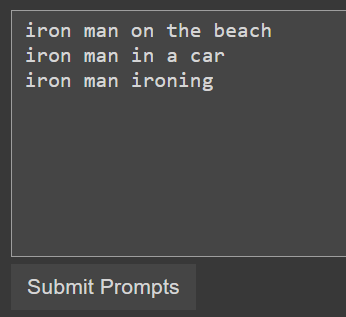

In [ ]:
prompts_input = widgets.Textarea(
    placeholder="Enter prompts (one per line)",
    layout=widgets.Layout(width='auto', height='150px')
)

submit_button = widgets.Button(
    description="Submit Prompts",
    layout=widgets.Layout(width='auto')
)

def handle_submit_button_click(b):
    global prompts_list
    prompts_text = prompts_input.value
    prompts_list = [x.strip() for x in prompts_text.split('\n')]
    modified_prompts = ['"' + prompt + '"' for prompt in prompts_list]
    print("Submitted Prompts:")
    for prompt in modified_prompts:
        print(prompt)

    # Update the prompts_list to use the modified prompts
    prompts_list = modified_prompts

submit_button.on_click(handle_submit_button_click)

display(prompts_input, submit_button)

### 3.3.2 Configuration Settings
The code below saves user defined configuration settings into a configuration file for running inference.
<br><br>

**Make sure to run the previous code blocks in sections 3.1 - 3.3 to ensure that you have selected the pretrained model and entered the prompts for inference.**
<br><br>

You can also modify the video settings in the "Default video settings" section on the right.
<br><br>
**IMPORTANT**: When using Google Colab, the maximum video length should be 8 due to the lack of resources.

<br>

**To save the config file, change the inputs as desired and run the cell again**

In [ ]:
import ipywidgets as widgets
import yaml

#@markdown Inference: Config for generating videos
config_file_name = "pose_test.yaml" #@param {type:"string"}
pretrained_model_path = "./checkpoints/" + selected_folder
video_output_dir = "gif_results" #@param {type:"string"}

# checkpoint config
resume_from_checkpoint = "./checkpoints/followyourpose_checkpoint-1000"

#@markdown <br> Default video settings
# seed for reproducibility
seed = 33 #@param {type:"integer"}

# video config settings
video_length = 8 #@param {type:"integer"}
video_width = 512 #@param {type:"integer"}
video_height = 512 #@param {type:"integer"}

# inference config settings
num_inference_steps = 50 #@param {type:"number"}
guidance_scale = 12.5 #@param {type:"number"}
use_inv_latent = False #@param {type:"boolean"}
num_inv_steps = 50 #@param {type:"number"}
dataset_set = "val" #@param {type:"string"}

train_batch_size = 1
validation_steps = 100
mixed_precision = 'no'
gradient_checkpointing = False
enable_xformers_memory_efficient_attention = True

# save as config file
config_dir = "FollowYourPose/configs"

# save each config item into dictionary
config_dict = {
  'pretrained_model_path': pretrained_model_path,
  'output_dir': video_output_dir,
  'validation_data':
    {
      'prompts': prompts_list,
      'video_length': video_length,
      'width': video_width,
      'height': video_height,
      'num_inference_steps': num_inference_steps,
      'guidance_scale': guidance_scale,
      'use_inv_latent': use_inv_latent,
      'num_inv_steps': num_inv_steps,
      'dataset_set': dataset_set,
    },
  'train_batch_size': train_batch_size,
  'validation_steps': validation_steps,
  'resume_from_checkpoint': resume_from_checkpoint,
  'seed': seed,
  'mixed_precision': mixed_precision,
  'gradient_checkpointing': gradient_checkpointing,
  'enable_xformers_memory_efficient_attention': enable_xformers_memory_efficient_attention
}

# save dictionary as config yaml file
config_file = config_dir + '/' + config_file_name
with open(config_file, 'w') as file:
  yaml.dump(config_dict, file, sort_keys=False)

print("Config file saved as " + config_file)


## 3.4. Generate Content

**To generate the inference outputs files, change the file paths as desired and run the cell again**

In [ ]:
config_file = "FollowYourPose/configs/pose_test.yaml" #@param {type:"string"}
MMPOSE_skeleton_file = "FollowYourPose/pose_example/vis_ikun_pose2.mov" #@param {type:"string"}

!accelerate launch txt2video.py --config={config_file}  --skeleton_path={MMPOSE_skeleton_file}

## 3.5. Playing the Generated Content

Select the desired file and play the generated gifs.

In [ ]:
gif_output_directory = './FollowYourPose/gif_results'

folder_contents = os.listdir(gif_output_directory)

gif_files = [file for file in folder_contents if file.lower().endswith('.gif')]

gif_dropdown = widgets.Dropdown(
    options=gif_files,
    description='Select a .gif file:',
    disabled=False,
)

button = widgets.Button(description="Play .gif File")
output = widgets.Output()

# Function to play the selected .gif file
def play_gif_file(_):
    selected_gif = gif_dropdown.value
    save_path = os.path.join(gif_output_directory, selected_gif)

    if selected_gif.lower().endswith('.gif'):
        with output:
            clear_output(wait=True)
            display(Image(open(save_path, 'rb').read(), format='png'))
    else:
        with output:
            clear_output(wait=True)
            print("Please select a valid .gif file.")

button.on_click(play_gif_file)

display(gif_dropdown)
display(button)
display(output)


## 3.6. Exit and free runtime memory

In [ ]:
exit()